<div style="background-color:#BFBEBE; text-align: center;">
<img src="imgs/icon.png" style="width:600px">
</div>

# Why Mel Scale is important?

!pip install youtube-dl

In [8]:
import librosa
import librosa.display

import youtube_dl
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Audio, display, Image, YouTubeVideo

In [9]:
def option_youtube(song, link):
    options = {
        'format': 'bestaudio/best',
        'extractaudio': True,
        'audioformat': 'wav',
        'outtmpl': 'audios/youtube/' + song + '.%(ext)s'}
    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([link])

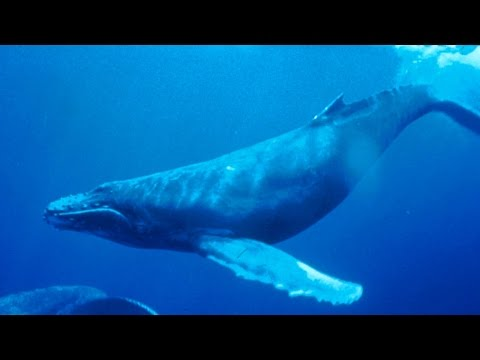

In [10]:
YouTubeVideo('W5Trznre92c')

In [5]:
!mkdir audios/youtube

In [11]:
option_youtube('Whales_Song', 'https://www.youtube.com/watch?v=W5Trznre92c')

[youtube] W5Trznre92c: Downloading webpage


ERROR: Unable to extract uploader id; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


DownloadError: ERROR: Unable to extract uploader id; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.

In [7]:
!ffmpeg -i "audios/youtube/Whales_Song.m4a" -vn -ac 1 -ar 44100 -f wav "audios/youtube/Whales_Song.wav"

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
!rm audios/youtube/*.m4a
!ls audios/youtube

In [12]:
y, sr = librosa.load('audios//whale-song-low.wav')

whale_song, _ = librosa.effects.trim(y)
Audio(data=whale_song, rate=sr)

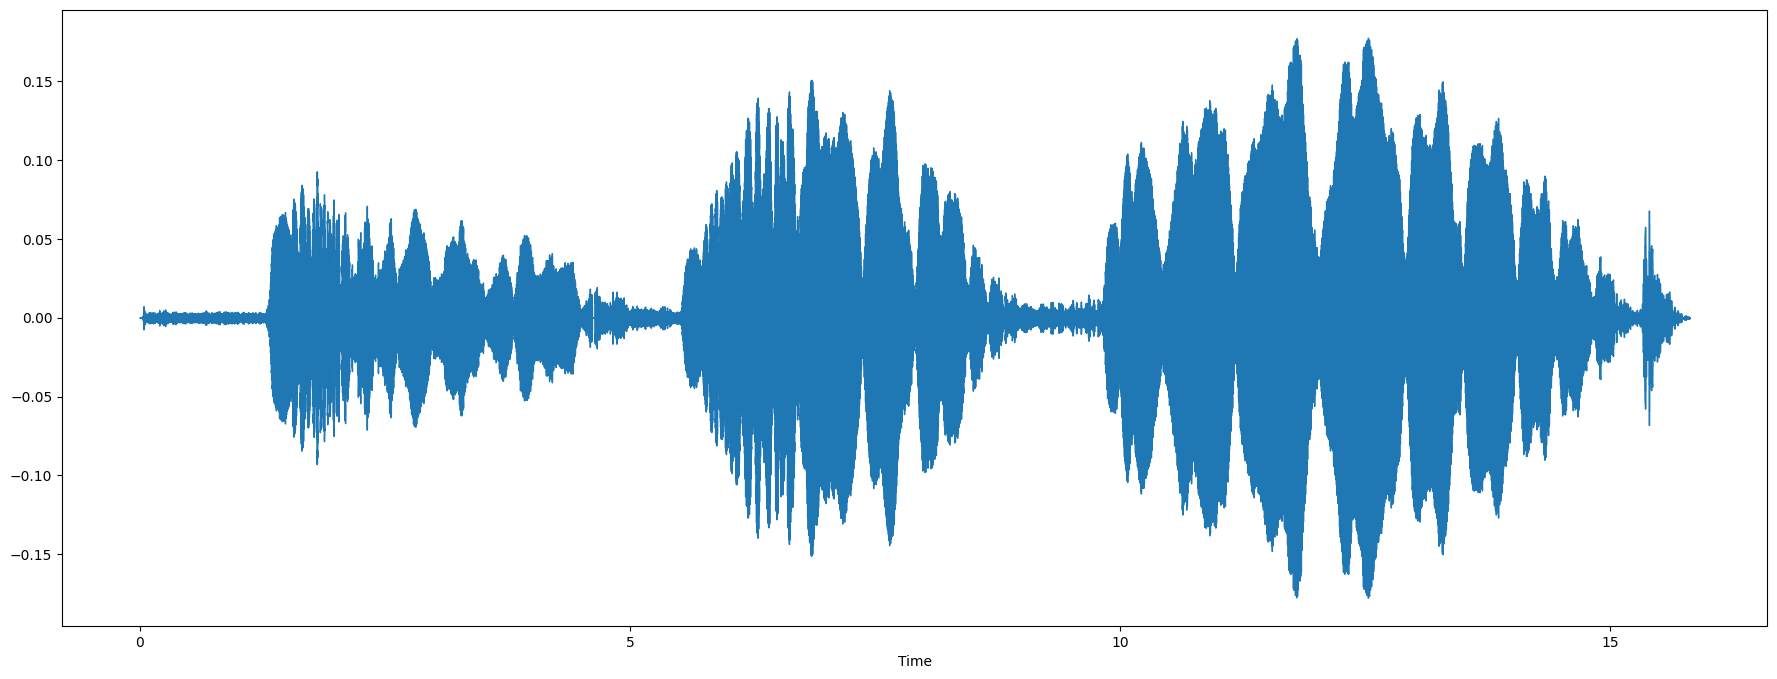

In [14]:
plt.figure(figsize=(22, 8))
librosa.display.waveshow(y=whale_song, sr=sr)
plt.show()

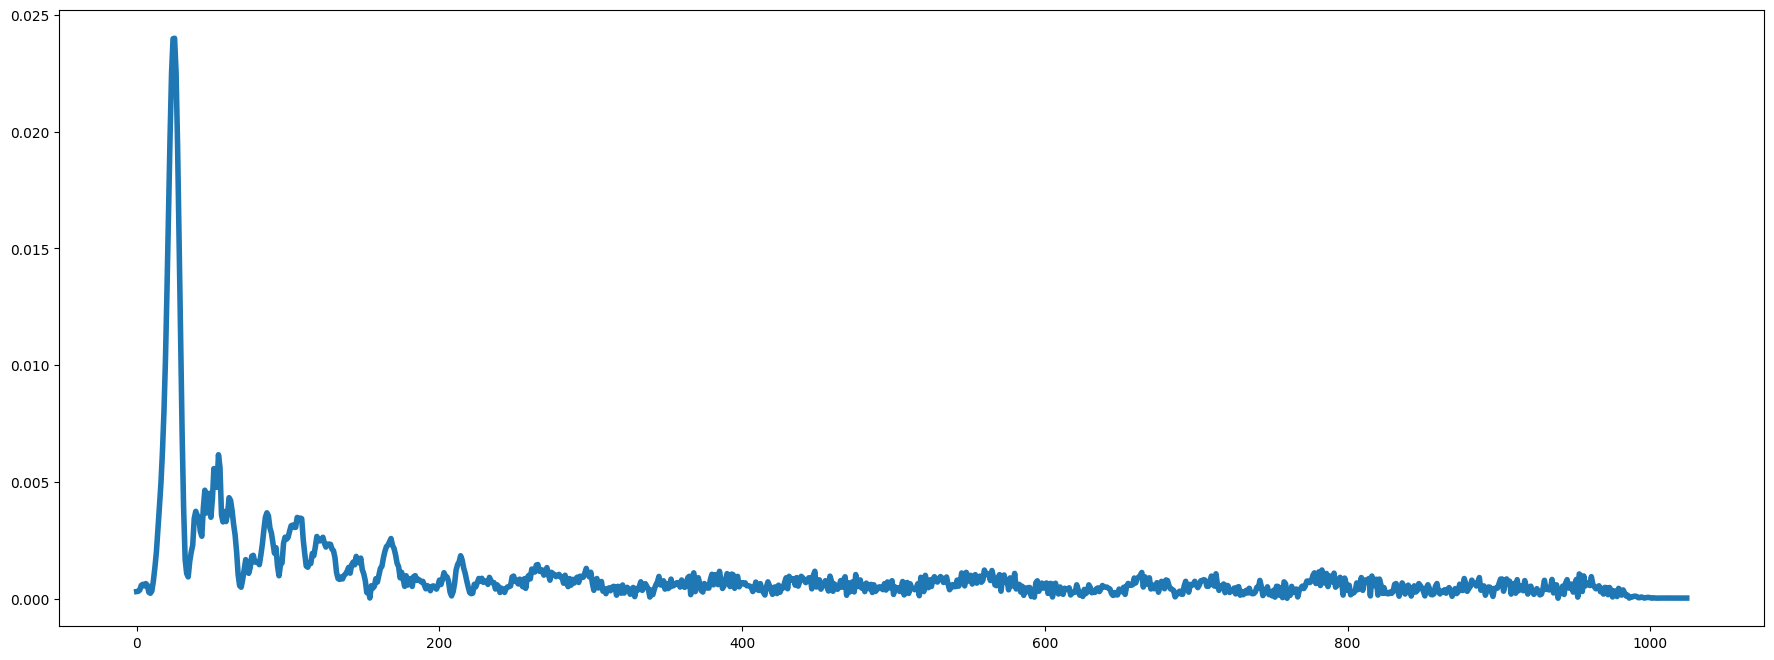

In [15]:
plt.figure(figsize=(22, 8))
n_fft = 2048
D = np.abs(librosa.stft(whale_song[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
plt.plot(D, linewidth=4)
plt.show()

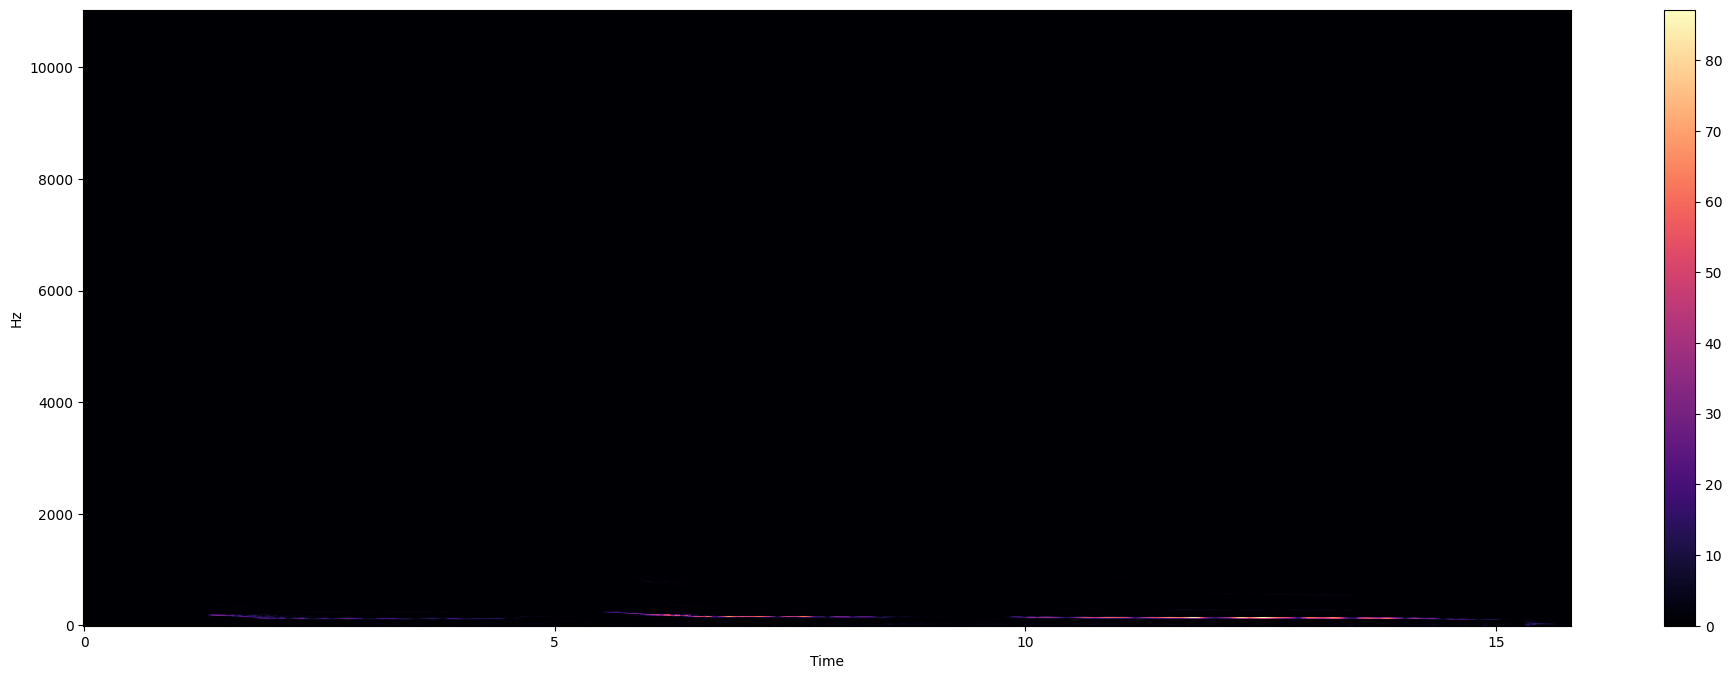

In [17]:
plt.figure(figsize=(24, 8))
hop_length = 512
D = np.abs(librosa.stft(whale_song, n_fft=n_fft, hop_length=hop_length))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear')
plt.colorbar()
plt.show()

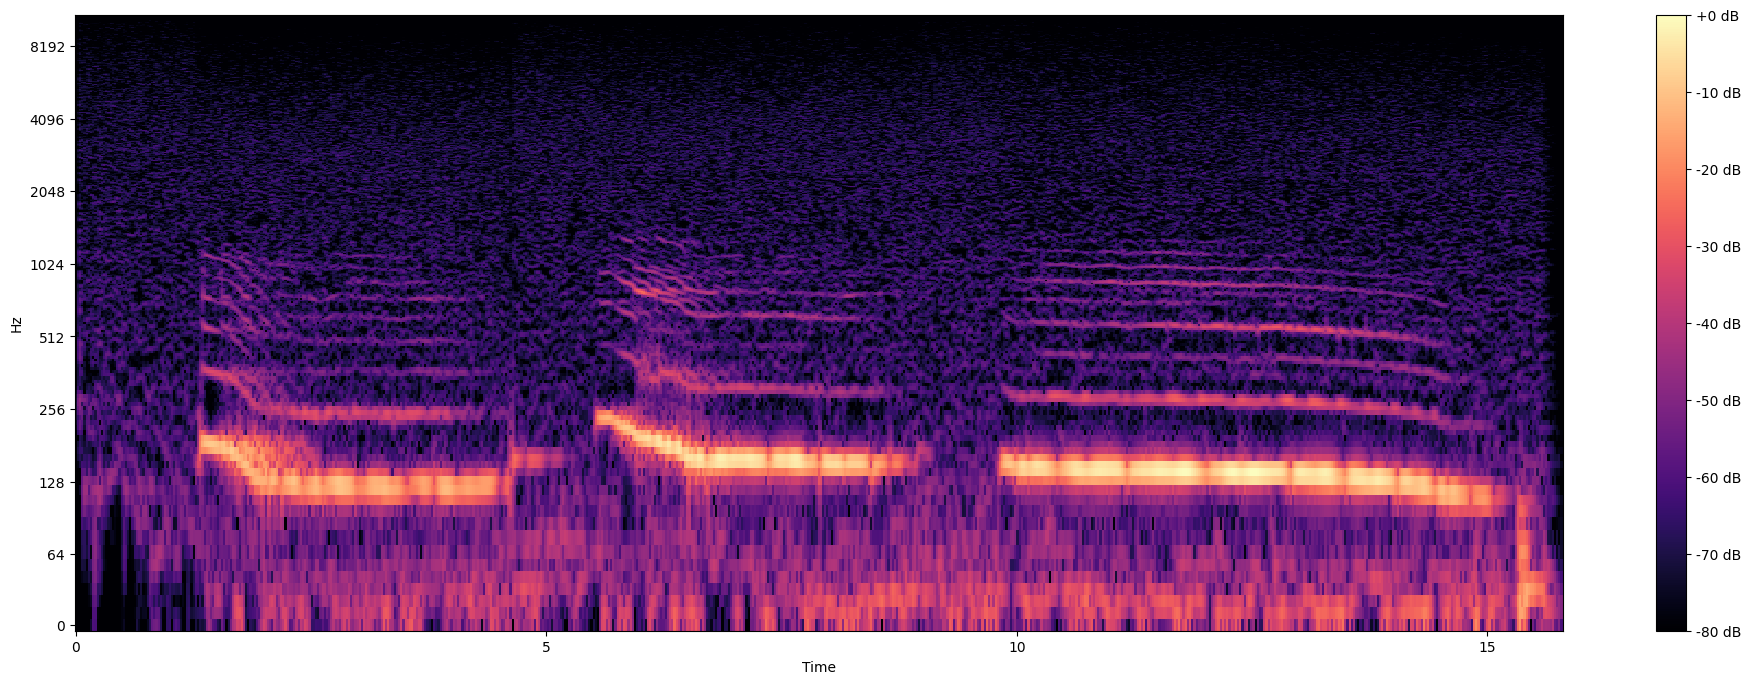

In [18]:
plt.figure(figsize=(24, 8))
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [19]:
n_mels = 128
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)

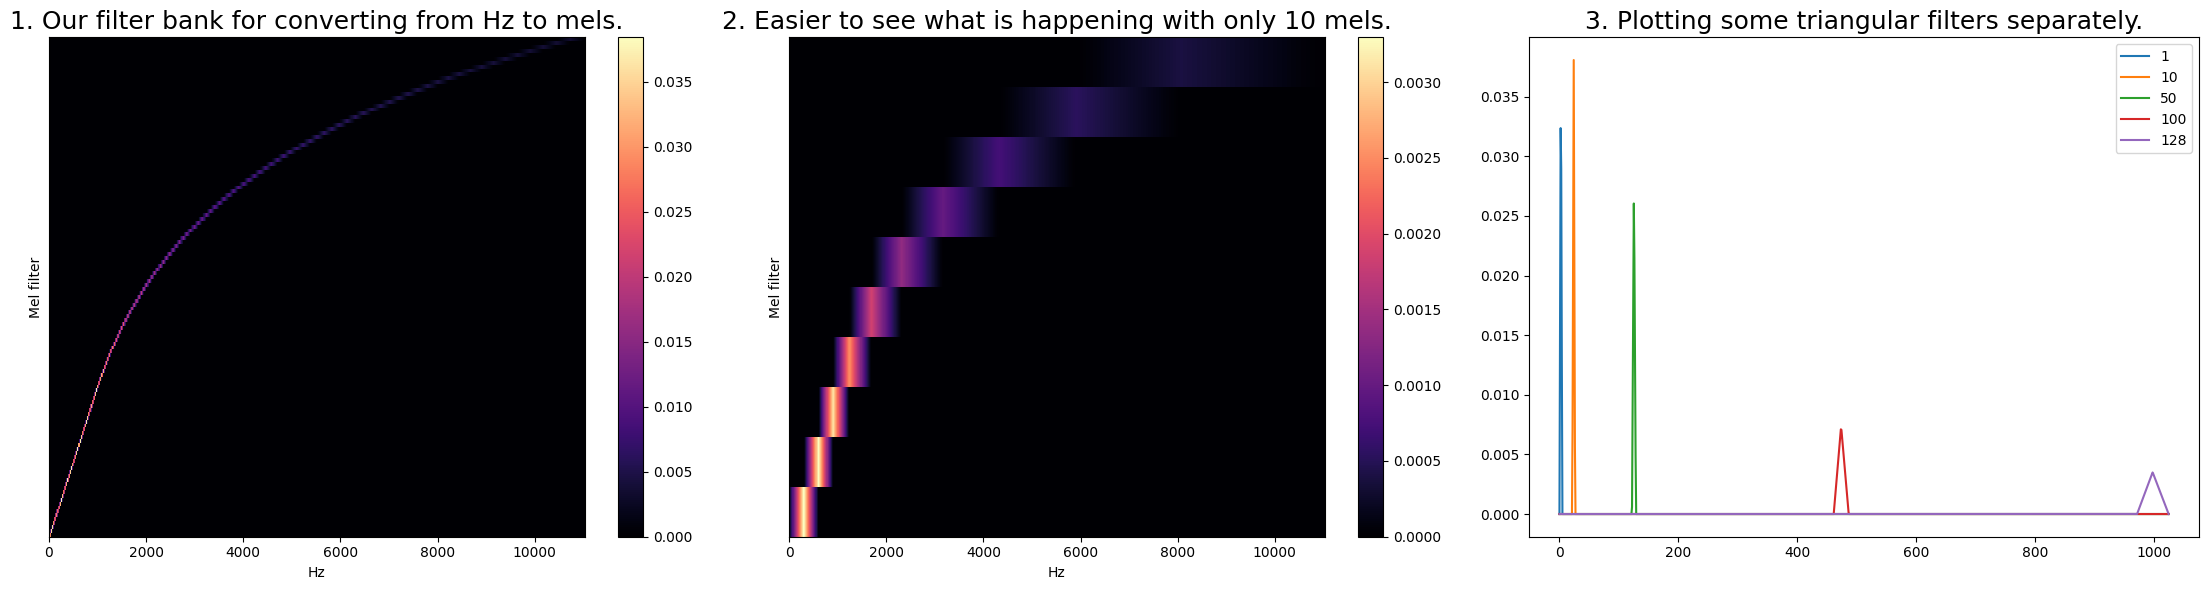

In [20]:
plt.figure(figsize=(22, 6))

plt.subplot(1, 3, 1);
librosa.display.specshow(mel, sr=sr, hop_length=hop_length, x_axis='linear');
plt.ylabel('Mel filter');
plt.colorbar();
plt.title('1. Our filter bank for converting from Hz to mels.', fontsize=18);


plt.subplot(1, 3, 2);
mel_10 = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=10)
librosa.display.specshow(mel_10, sr=sr, hop_length=hop_length, x_axis='linear');
plt.ylabel('Mel filter');
plt.colorbar();
plt.title('2. Easier to see what is happening with only 10 mels.', fontsize=18);

plt.subplot(1, 3, 3);
idxs_to_plot = [0, 9, 49, 99, 127]
for i in idxs_to_plot:
    plt.plot(mel[i]);
plt.legend(labels=['{}'.format(i+1) for i in idxs_to_plot]);
plt.title('3. Plotting some triangular filters separately.', fontsize=18);

plt.tight_layout();

Text(0.5, 1.0, 'One sampled window for example, before and after converting to mel')

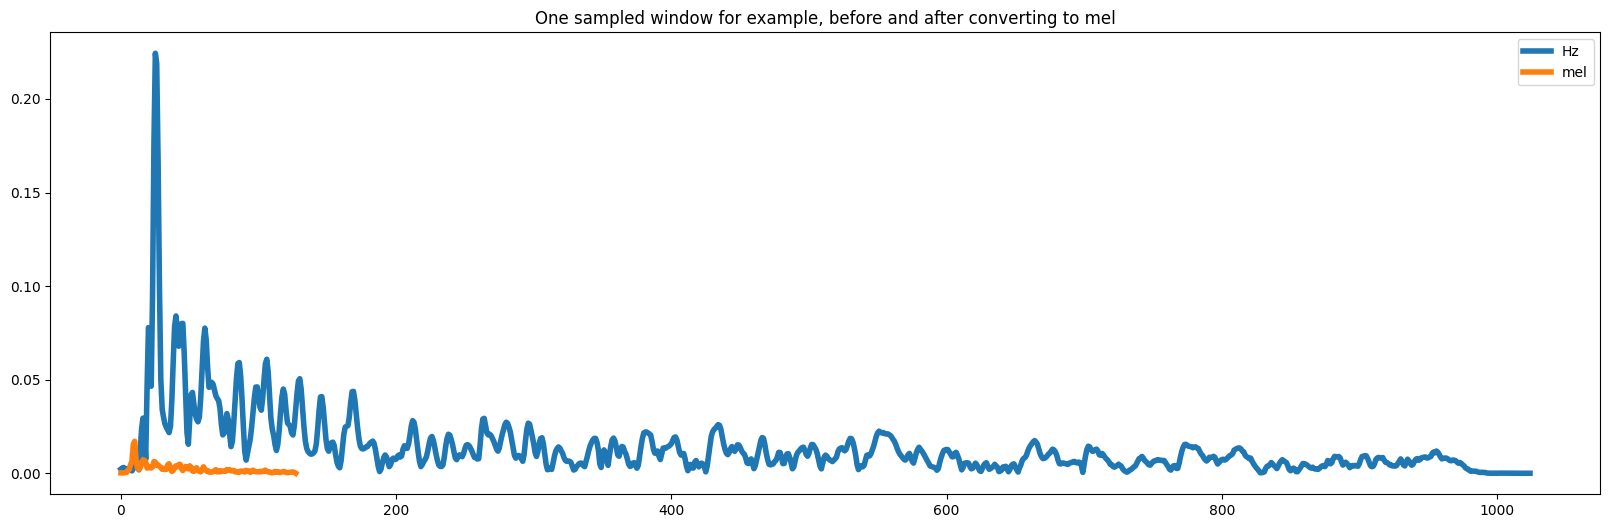

In [21]:
plt.figure(figsize=(20, 6))
plt.plot(D[:, 1], linewidth=4)
plt.plot(mel.dot(D[:, 1]), linewidth=4)
plt.legend(labels=['Hz', 'mel'])
plt.title('One sampled window for example, before and after converting to mel')

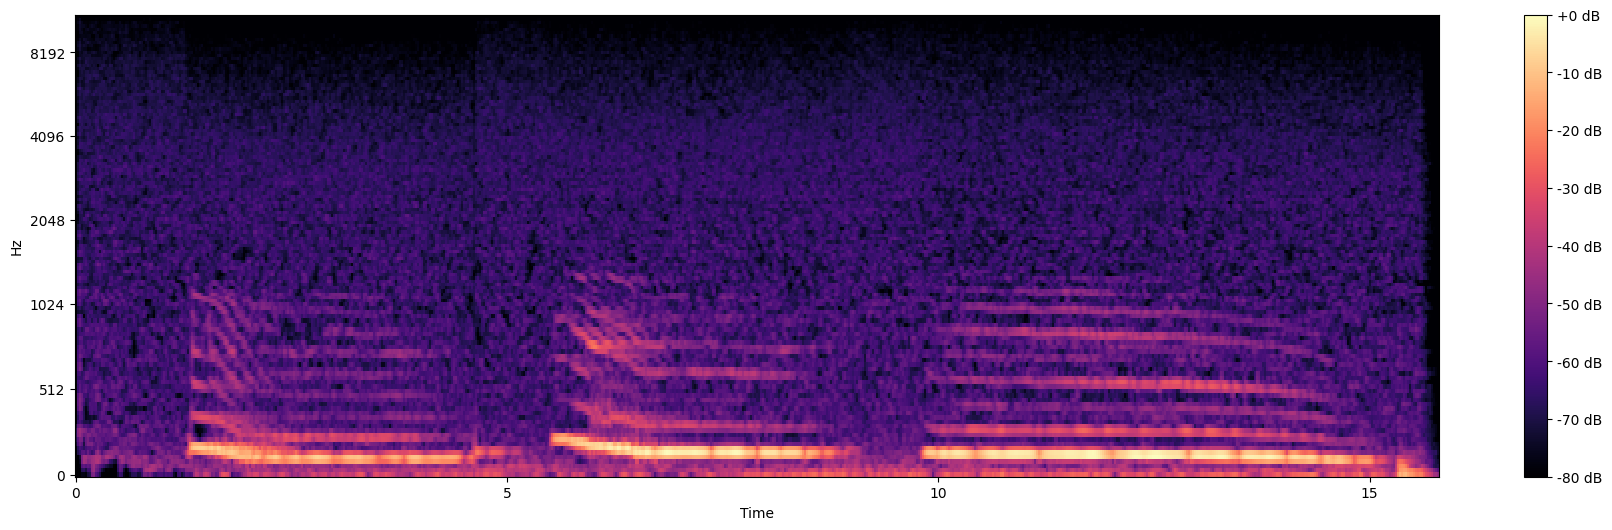

In [23]:
S = librosa.feature.melspectrogram(y=whale_song, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(22, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB')

ref: [Dalya Gartzman](https://www.freecodecamp.org/news/author/dalyag/)